In [202]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
import keras

In [203]:
data = pd.read_csv('1613615-Stock_Price_data_set.csv')

In [204]:
data.Close[0:100]

0     254.259995
1     265.720001
2     264.559998
3     250.100006
4     249.470001
         ...    
95    415.440002
96    411.089996
97    384.480011
98    399.390015
99    390.390015
Name: Close, Length: 100, dtype: float64

In [205]:
data['Adj Close'].sum()

422771.739517

In [206]:
data['Close'].sum()

422771.739517

In [207]:
data.drop( columns = 'Adj Close' , inplace = True )

In [208]:
data.tail()

,Date,Open,High,Low,Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,7782400


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.4+ KB


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

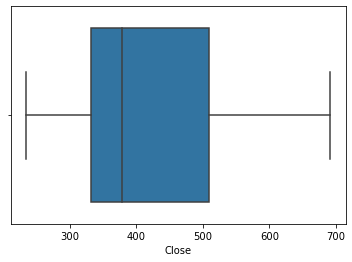

In [210]:
sns.boxplot(data['Close'])


In [211]:
data.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,1.000000


<AxesSubplot:>

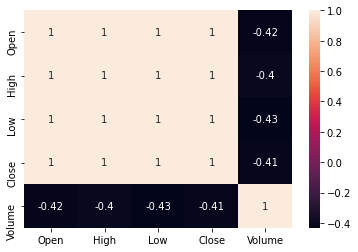

In [212]:
sns.heatmap(data.corr(), annot = True)

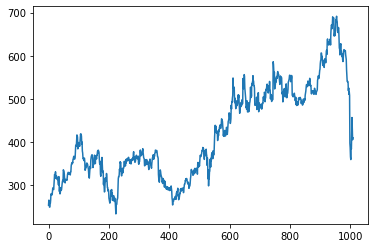

In [213]:
plt.plot(data['Close'])

In [214]:
df = data['Close']

In [215]:
df.value_counts()

357.320007    3
311.690002    2
488.239990    2
358.820007    2
325.220001    2
             ..
497.980011    1
350.920013    1
290.059998    1
343.089996    1
475.739990    1
Name: Close, Length: 988, dtype: int64

In [216]:
from sklearn.preprocessing import MinMaxScaler

In [217]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [218]:
training_size = int(len(df1)*0.65)
test_size =len(df1) - training_size

In [219]:
train_data , test_data = df1[0:training_size:],df1[training_size:len(df1), :1]

In [220]:
len(test_data)

354

In [221]:
def create_dataset(dataset , step_size = 1):
    datax , datay = [] , []
    for i in range(len(dataset) - step_size - 1 ):
        a = dataset[i:(i+step_size),0]
        datax.append(a)
        datay.append(dataset[i+step_size,0])
    return np.array(datax),np.array(datay)
        
    

In [222]:
time_step = 100
x_train, y_train = create_dataset(train_data , time_step)
x_test, y_test = create_dataset(test_data , time_step)

In [223]:
x_test

array([[0.54203708, 0.52943362, 0.57253006, ..., 0.66656468, 0.68648559,
        0.66746032],
       [0.52943362, 0.57253006, 0.54603434, ..., 0.68648559, 0.66746032,
        0.69522284],
       [0.57253006, 0.54603434, 0.51619669, ..., 0.66746032, 0.69522284,
        0.69223035],
       ...,
       [0.79434695, 0.79692442, 0.77632637, ..., 0.33380662, 0.32869527,
        0.42214021],
       [0.79692442, 0.77632637, 0.75114132, ..., 0.32869527, 0.42214021,
        0.48764772],
       [0.77632637, 0.75114132, 0.76230312, ..., 0.42214021, 0.48764772,
        0.4272515 ]])

In [224]:
x_test.shape

(253, 100)

In [225]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [226]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [227]:
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True ))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [228]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.fit(x_train , y_train , validation_data = (x_test,y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
9/9 [==============================] - 29s 851ms/step - loss: 0.0351 - val_loss: 0.0211
Epoch 2/100
9/9 [==============================] - 3s 348ms/step - loss: 0.0087 - val_loss: 0.0345
Epoch 3/100
9/9 [==============================] - 3s 306ms/step - loss: 0.0058 - val_loss: 0.0116
Epoch 4/100
9/9 [==============================] - 3s 340ms/step - loss: 0.0044 - val_loss: 0.0083
Epoch 5/100
9/9 [==============================] - 5s 523ms/step - loss: 0.0034 - val_loss: 0.0074
Epoch 6/100
9/9 [==============================] - 4s 415ms/step - loss: 0.0030 - val_loss: 0.0153
Epoch 7/100
9/9 [==============================] - 4s 402ms/step - loss: 0.0028 - val_loss: 0.0094
Epoch 8/100
9/9 [==============================] - 3s 356ms/step - loss: 0.0027 - val_loss: 0.0082
Epoch 9/100
9/9 [==============================] - 3s 357ms/step - loss: 0.0027 - val_loss: 0.0110
Epoch 10/100
9/9 [==============================] - 3s 340ms/step - loss: 0.0027 - val_loss: 0.0086
Epoch 11

In [230]:
train_predict  = model.predict(x_train)
test_predict  = model.predict(x_test)

8/8 [==============================] - 1s 86ms/step


In [231]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [232]:
train_predict

array([[390.07074],
       [394.7706 ],
       [398.21713],
       [402.81448],
       [401.48788],
       [401.73795],
       [407.3179 ],
       [417.17694],
       [421.0405 ],
       [420.92514],
       [416.1712 ],
       [402.5627 ],
       [395.7947 ],
       [385.72287],
       [378.24182],
       [371.41525],
       [367.40982],
       [367.67883],
       [366.90826],
       [368.152  ],
       [369.2971 ],
       [365.4284 ],
       [351.3486 ],
       [340.4779 ],
       [336.84753],
       [340.5158 ],
       [345.0153 ],
       [350.7988 ],
       [354.8742 ],
       [354.17798],
       [351.97247],
       [348.61063],
       [344.31848],
       [340.1205 ],
       [333.69275],
       [327.79483],
       [322.9882 ],
       [325.0033 ],
       [333.53906],
       [344.10492],
       [348.8741 ],
       [355.84363],
       [363.45248],
       [369.1712 ],
       [370.74133],
       [370.5667 ],
       [368.39813],
       [364.80722],
       [353.02887],
       [345.95053],


In [233]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

366.7188246719108

In [234]:
math.sqrt(mean_squared_error(y_test , test_predict))

564.1278097310651

In [235]:
len(test_data)

354

In [236]:
input_data = test_data[254: ].reshape(1,-1)

In [237]:
input_data.shape

(1, 100)

In [238]:
input_data

array([[0.76230312, 0.77023219, 0.77645742, 0.74605183, 0.74104981,
        0.77929713, 0.78499816, 0.78309782, 0.7836439 , 0.76444371,
        0.79766714, 0.82230625, 0.82844416, 0.8070378 , 0.87575631,
        0.88512696, 0.8692907 , 0.87105998, 0.85878416, 0.85419716,
        0.86472556, 0.87355013, 0.86151455, 0.88265868, 0.88490858,
        0.85463405, 0.91583838, 0.94122022, 0.95624816, 0.94938952,
        0.93715729, 0.9614687 , 0.99698564, 0.97702099, 0.96948509,
        0.99257329, 0.94912741, 0.8995871 , 0.9121033 , 0.92202003,
        0.90218643, 0.92549314, 0.98016641, 0.97300193, 0.99062935,
        1.        , 0.97887774, 0.97184418, 0.92903172, 0.91780432,
        0.92704392, 0.94309869, 0.93916696, 0.89124314, 0.83853568,
        0.83569596, 0.804373  , 0.82743933, 0.85559515, 0.86105593,
        0.82374784, 0.82518942, 0.80968086, 0.79532991, 0.81072929,
        0.78019265, 0.77073453, 0.78604659, 0.81046718, 0.83082499,
        0.83049742, 0.82837857, 0.82311443, 0.82

In [239]:
temp_input = input_data.tolist()
temp_input = input_data[0]

In [240]:
len(temp_input)

100

In [241]:
temp_input.reshape(-1,1)
x_input = temp_input.reshape(-1 ,100 ,1)

In [242]:
y_hat = model.predict(x_input)

1/1 [==============================] - 0s 58ms/step


In [243]:
y_hat

array([[0.4030859]], dtype=float32)

In [244]:
result_input = x_input.reshape(-1,1)

In [245]:
final_input =  scaler.inverse_transform(result_input)

In [246]:
final_input

array([[582.869995],
       [586.5     ],
       [589.349976],
       [575.429993],
       [573.140015],
       [590.650024],
       [593.26001 ],
       [592.390015],
       [592.640015],
       [583.849976],
       [599.059998],
       [610.340027],
       [613.150024],
       [603.349976],
       [634.809998],
       [639.099976],
       [631.849976],
       [632.659973],
       [627.039978],
       [624.940002],
       [629.76001 ],
       [633.799988],
       [628.289978],
       [637.969971],
       [639.      ],
       [625.140015],
       [653.159973],
       [664.780029],
       [671.659973],
       [668.52002 ],
       [662.919983],
       [674.049988],
       [690.309998],
       [681.169983],
       [677.719971],
       [688.289978],
       [668.400024],
       [645.719971],
       [651.450012],
       [655.98999 ],
       [646.909973],
       [657.580017],
       [682.609985],
       [679.330017],
       [687.400024],
       [691.690002],
       [682.02002 ],
       [678.7

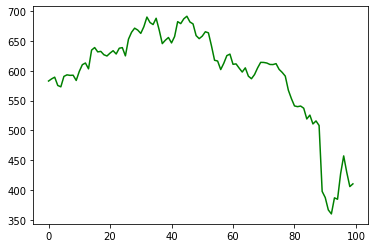

In [247]:
plt.plot(final_input ,color= 'green')

In [248]:
result_output = y_hat.reshape(-1,1)

In [249]:
final_output = scaler.inverse_transform(result_output)

In [250]:
final_output

array([[418.41675]], dtype=float32)

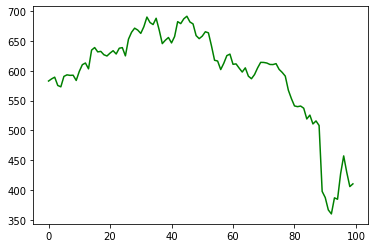

In [251]:
plt.plot(final_input ,color= 'green')
plt.plot(final_output ,color= 'orange')